In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("/content/drive/MyDrive/class/情報デザイン論/Notebook/")

In [3]:
import pandas as pd
from IPython.display import HTML

In [4]:
from gaze_plot_utils import (
    plot_gaze_trajectory_with_gradient,
    plot_gaze_heatmap,
    plot_gaze_heatmap_with_background,
    animate_gaze_plot_with_background
)

In [5]:
df2_1 = pd.read_csv("/content/drive/MyDrive/class/情報デザイン論/加工データ csv/user-2/user-2-pic-1.csv")

In [6]:
df2_1.head()

,Unnamed: 0.1,Unnamed: 0,Recording timestamp,Computer timestamp,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,...,Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Eye movement type,Eye movement event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm)
0,7058,7058,131505488,6790459509,6.808775e+09,1168.0,517.0,1168.0,509.0,1168.0,...,0.4713,0.6084,0.4853,Fixation,216.0,163.0,1175.0,511.0,0.6122,0.4728
1,7059,7059,131521504,6790475525,6.808791e+09,1168.0,515.0,1167.0,510.0,1170.0,...,0.4725,0.6093,0.4818,Fixation,216.0,163.0,1175.0,511.0,0.6122,0.4728
2,7060,7060,131538250,6790492271,6.808808e+09,1173.0,510.0,1168.0,507.0,1178.0,...,0.4696,0.6136,0.4740,Fixation,216.0,163.0,1175.0,511.0,0.6122,0.4728
3,7061,7061,131555411,6790509432,6.808825e+09,1172.0,509.0,1163.0,509.0,1181.0,...,0.4709,0.6150,0.4718,Fixation,216.0,163.0,1175.0,511.0,0.6122,0.4728
4,7062,7062,131571376,6790525397,6.808841e+09,1084.0,487.0,1075.0,481.0,1094.0,...,0.4458,0.5696,0.4569,Saccade,50.0,215.0,NaN,NaN,NaN,NaN


In [7]:
for col in df2_1.columns:
    print(col)

Unnamed: 0.1
Unnamed: 0
Recording timestamp
Computer timestamp
Eyetracker timestamp
Gaze point X
Gaze point Y
Gaze point left X
Gaze point left Y
Gaze point right X
Gaze point right Y
Gaze direction left X
Gaze direction left Y
Gaze direction left Z
Gaze direction right X
Gaze direction right Y
Gaze direction right Z
Pupil diameter left
Pupil diameter right
Pupil diameter filtered
Validity left
Validity right
Eye position left X (DACSmm)
Eye position left Y (DACSmm)
Eye position left Z (DACSmm)
Eye position right X (DACSmm)
Eye position right Y (DACSmm)
Eye position right Z (DACSmm)
Gaze point left X (DACSmm)
Gaze point left Y (DACSmm)
Gaze point right X (DACSmm)
Gaze point right Y (DACSmm)
Gaze point X (MCSnorm)
Gaze point Y (MCSnorm)
Gaze point left X (MCSnorm)
Gaze point left Y (MCSnorm)
Gaze point right X (MCSnorm)
Gaze point right Y (MCSnorm)
Eye movement type
Eye movement event duration
Eye movement type index
Fixation point X
Fixation point Y
Fixation point X (MCSnorm)
Fixation 

In [8]:
min_ts = df2_1['Eyetracker timestamp'].min()
max_ts = df2_1['Eyetracker timestamp'].max()

print(f"Min timestamp: {min_ts} microseconds")
print(f"Max timestamp: {max_ts} microseconds")
print(f"Diff timestamp: {max_ts - min_ts} microseconds")

Min timestamp: 6808775341.0 microseconds
Max timestamp: 6840774061.0 microseconds
Diff timestamp: 31998720.0 microseconds


In [9]:
sampling_intervals = df2_1['Eyetracker timestamp'].diff().dropna()
print(f"Mean interval: {sampling_intervals.mean():.2f} µs")
print(f"Median interval: {sampling_intervals.median():.2f} µs")


Mean interval: 16640.00 µs
Median interval: 16686.00 µs


# 前処理

In [10]:
selected_columns = [
    'Eyetracker timestamp',
    'Gaze point X',
    'Gaze point Y',
    'Gaze point left X',
    'Gaze point left Y',
    'Gaze point right X',
    'Gaze point right Y',
    'Validity left',
    'Validity right'
]

df_selected = df2_1[selected_columns]


# グラフの描画

### FHDにおけるX座標とY座標の散布図

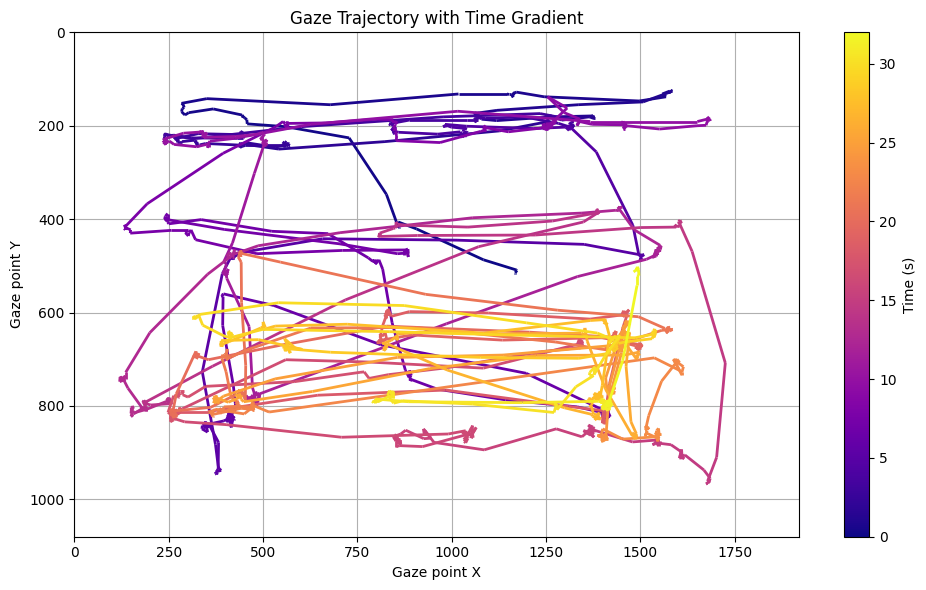

In [11]:
plot_gaze_trajectory_with_gradient(
    df=df_selected,
    x_col='Gaze point X',
    y_col='Gaze point Y',
    time_col='Eyetracker timestamp',
    screen_width=1920,
    screen_height=1080,
    title='Gaze Trajectory with Time Gradient'
)

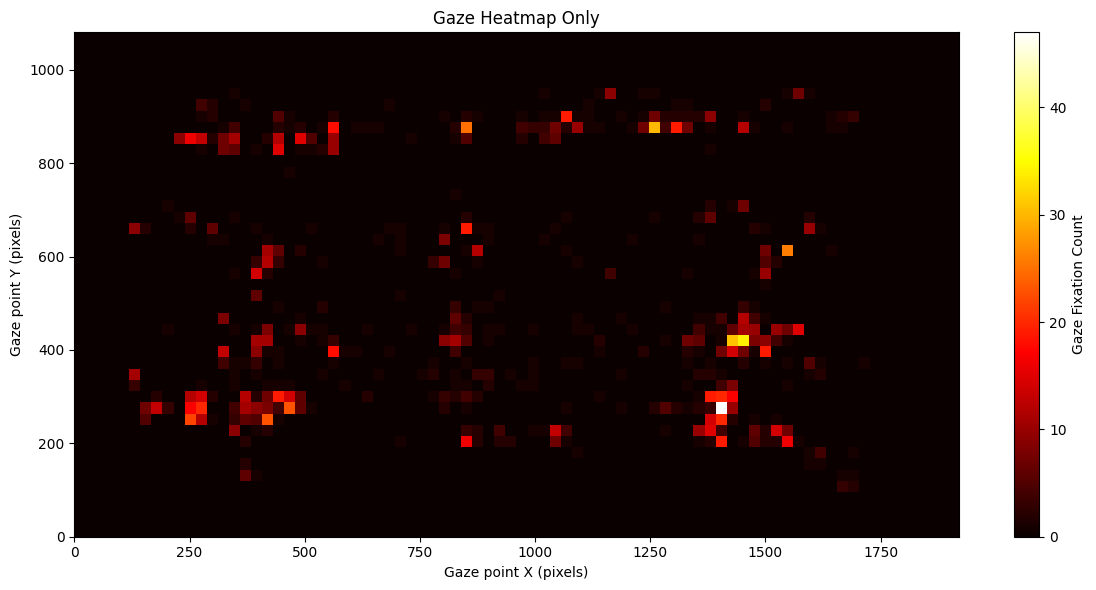

In [12]:
plot_gaze_heatmap(
    df=df_selected,
    x_col='Gaze point X',
    y_col='Gaze point Y',
    screen_width=1920,
    screen_height=1080,
    bins=(80, 45),  # 例: 24ピクセル単位
    title='Gaze Heatmap Only'
)

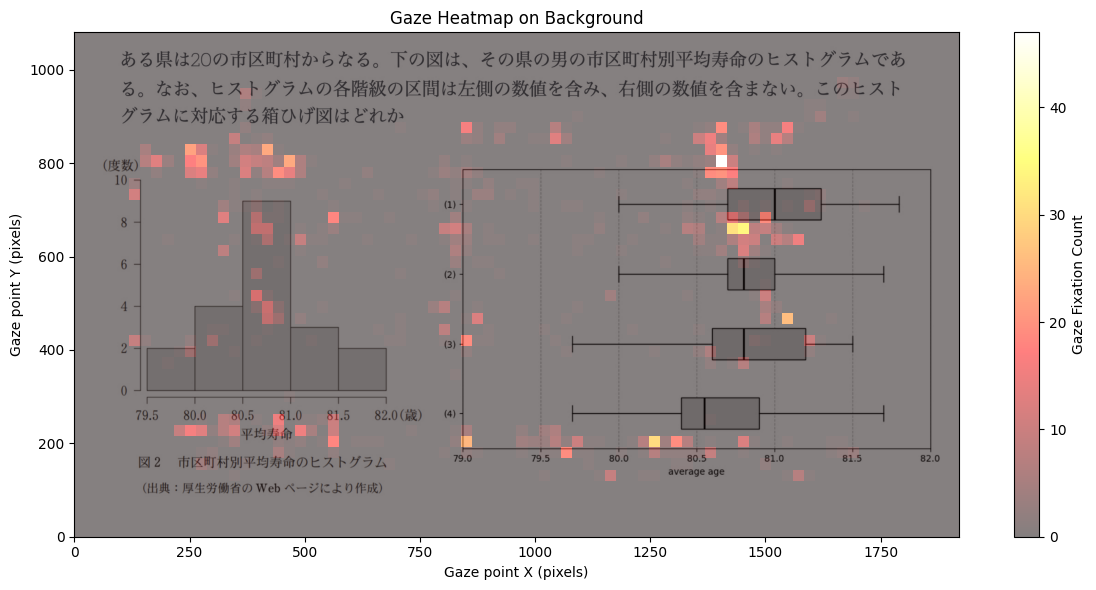

In [13]:
plot_gaze_heatmap_with_background(
    df=df_selected,
    background_path='/content/drive/MyDrive/class/情報デザイン論/question/視線誘導問題.001.jpeg',  # 背景画像パス
    x_col='Gaze point X',
    y_col='Gaze point Y',
    bins=(80, 45),
    title='Gaze Heatmap on Background'
)


In [ ]:
ani = animate_gaze_plot_with_background(
    df=df_selected,
    background_path='/content/drive/MyDrive/class/情報デザイン論/question/視線誘導問題.001.jpeg',
    screen_width=1920,
    screen_height=1080,
    interval_ms=50,         # フレーム間隔（ms）
    trail_length=15,        # 履歴点数
    title='Animated Gaze Movement',
    save_path="/content/drive/MyDrive/class/情報デザイン論/加工データ csv/user-2/Gaze-Animation_1.mp4"          # または 'output.mp4' で保存
)

HTML(ani.to_jshtml())  # Jupyter Notebook 上で表示


In [ ]:
ani = animate_gaze_plot_with_background(
    df=df_selected,
    background_path='/content/drive/MyDrive/class/情報デザイン論/question/視線誘導問題.001.jpeg',
    screen_width=1920,
    screen_height=1080,
    interval_ms=17,         # フレーム間隔（ms）
    trail_length=15,        # 履歴点数
    title='Animated Gaze Movement',
    save_path="/content/drive/MyDrive/class/情報デザイン論/加工データ csv/user-2/Gaze-Animation_1_60fps.mp4"          # または 'output.mp4' で保存
)